# Deep learning implementations which complete localization OR classifications tasks


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MIO-TCD-Classification/train/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MIO-TCD-Classification/train/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MIO-TCD-Classification/train/t10k-images-idx3-ubyte.gz
Extracting MIO-TCD-Classification/train/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


Text(0.5,1,'(Label: pedestrian)')

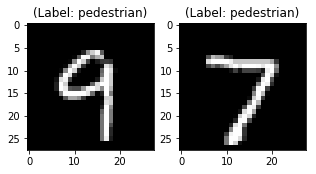

In [1]:
# motivation of code below was found on https://www.datacamp.com/community/tutorials/cnn-tensorflow-python

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

data = input_data.read_data_sets('MIO-TCD-Classification/train',one_hot=True)

print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

#dictionary with class names and corresponding class labels
label_dict = {
 0: 'articulated_truck',
 1: 'background',
 2: 'bicycle',
 3: 'bus',
 4: 'car',
 5: 'motorcycle',
 6: 'non-motorized_vehicle',
 7: 'pedestrian',
 8: 'pickup_truck',
 9: 'single_unit_truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(data.train.images[8], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")


In [2]:
data.train.images[0]
np.max(data.train.images[0])
np.min(data.train.images[0])

# Reshape training and testing image
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)

In [3]:
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
train_y = data.train.labels
test_y = data.test.labels
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

In [5]:
training_iters = 30 
learning_rate = 0.001 
batch_size = 128

# define network parameters 

# here wedefine number of inputs 
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [6]:
weights = {
    'wc1': tf.get_variable('M0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('M1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('M2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('M3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('M6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('P0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('P1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('P2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('P3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('P4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

In [8]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [9]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.009128, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.97500
Iter 1, Loss= 0.005268, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98080
Iter 2, Loss= 0.002693, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98610
Iter 3, Loss= 0.001607, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98840
Iter 4, Loss= 0.001672, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98690
Iter 5, Loss= 0.001582, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99020
Iter 6, Loss= 0.000546, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98900
Iter 7, Loss= 0.000748, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98980
Iter 8, Loss= 0.003814, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98700
Iter 9, Loss= 0.000588, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98630


In [ ]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

In [ ]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

1. Schematic of architecture (1 point) 

Uses Convolution Neural Network using the TensorFlow framework for classification.  
first we load the data using one hot encoding,
Secondly, we analyze the data 
Next, we construct the deep neaural network model using 3 convolutional layers: 
     1. 32-3 x 3 filters 
     2. 64-3 x 3 filters 
     3. 128-3 x 3 filters 
     4. Additionally, there are 3 max pooling layers of size 2x2 each 
then we train and test the model, 
then we train our model with dropouts inserted(to avoid overfitting), 
Finally, we make predicitions of the test data. 

2. Description of training(2 points) 
We first define our training iterations (50), a learning rate(0.001) with a fixed batch size(128). 
Next we use placeholders: x is an input placeholder and y holds the label of the training images in a form of a matrix
We then define convolution and max pooling functions with certain weights and bias parameters
after the data passes these layers, we flatten the output and connect the flattened neurons with each neuron in the next layer.
In the last layer, we have 11 neurons to classify 11 labels, 
Finally we apply the adam optimizer
To train: we launch the graph and run the session to execute the variables and run the tensor. Then we use two for loops, one of training iterations and one for batch size. Finally we feed the placeholders x and y the actual data; they then return the loss and accuracy. 

3. Evaluation of performance(1 point) 

Here we have to put the testing accuracy percentage 

4. Description of validation(3 points) 

5. Camparision with the methods from sections 2&3(1 point) 

5. Code with a description of the environment (2 points)